In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [2]:
grid=xr.open_dataset('/mnt/meom/MODEL_SET/eNATL60/eNATL60-I/mask_eNATL60SICIL_3.6.nc')
navlon=grid['nav_lon']
navlat=grid['nav_lat']
mask=grid['tmask'][0,0]
mask_mask=ma.masked_where(mask==0.,mask)

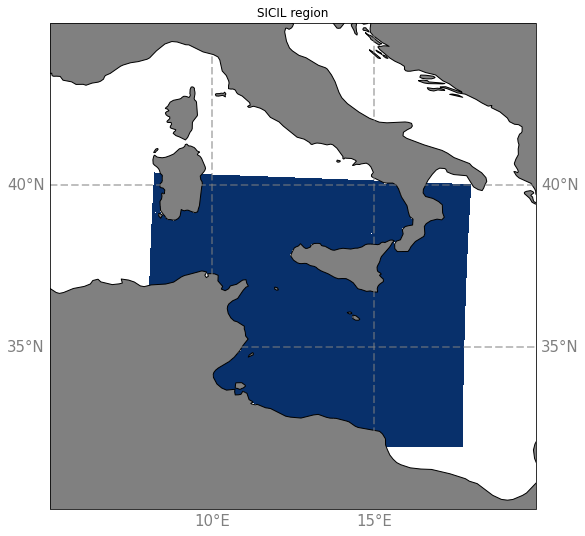

In [7]:
fig = plt.figure(figsize=(22,10))

ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlon,navlat,mask_mask,transform=ccrs.PlateCarree(),cmap='Blues',vmin=0,vmax=1)
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='grey')
ax.add_feature(land_50m)
#ax.coastlines()
extent = [5,20, 30,45]
ax.set_extent(extent)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-90,90,5))
gl.ylocator = mticker.FixedLocator(np.arange(0,90,5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabels_right = False
gl.xlabels_top = False
fig.subplots_adjust(right=0.8)

plt.title('SICIL region')
plt.savefig('region_SICIL.png', bbox_inches='tight')